In [1]:
#Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import seaborn as sns


In [15]:
#Importing the dataset
data = pd.read_csv("/content/Advertising_data.csv")
data.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,2210
1,44.5,39.3,45.1,1040
2,17.2,45.9,69.3,930
3,151.5,41.3,58.5,1850
4,180.8,10.8,58.4,1290


#Simple Linear Regression

initiating the variables 


In [4]:
X = data['TV'].values.reshape(-1,1)
y = data['sales'].values.reshape(-1,1)

Scatter Plot

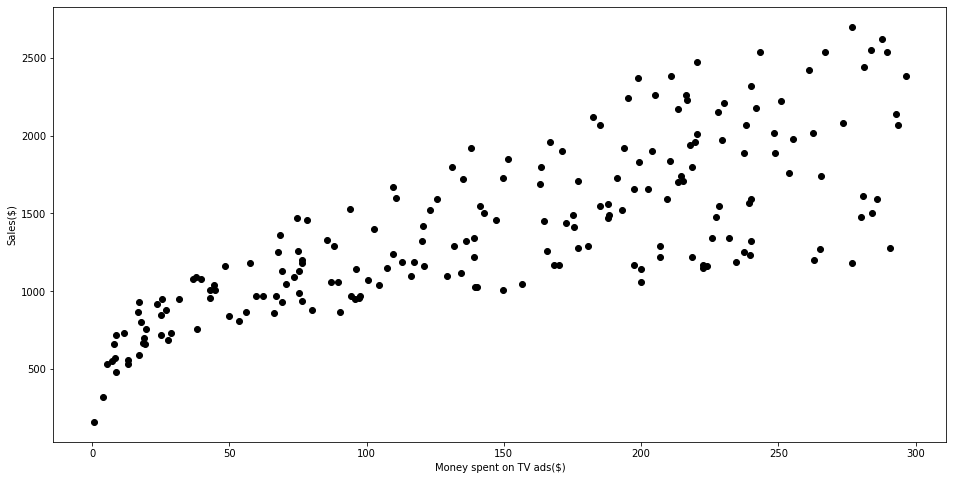

In [5]:
plt.figure(figsize=(16,8))
plt.scatter(X,y, c='black')
plt.xlabel('Money spent on TV ads($)')
plt.ylabel('Sales($)')
plt.show()


#Splitting dataset into training and testing dataset

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Fitting linear regression to our training set to train our model

In [13]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#Predicting the test set result

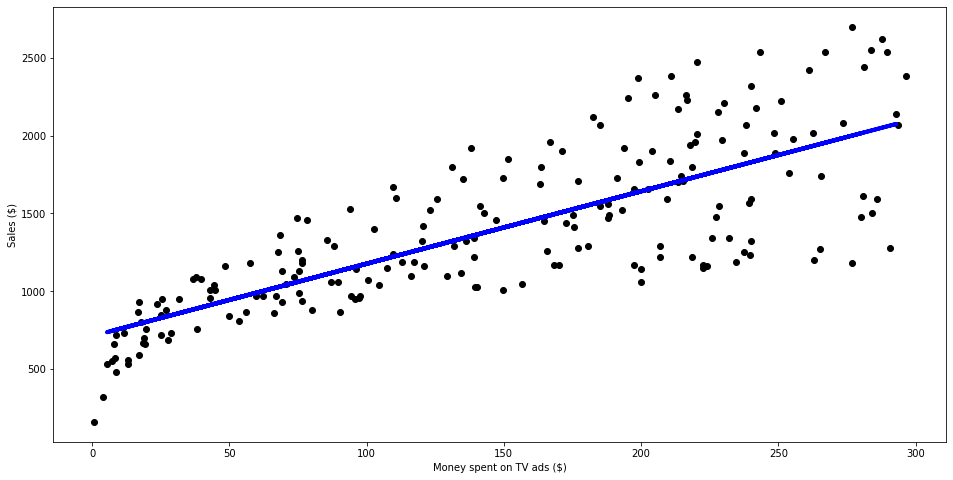

In [8]:
y_pred = reg.predict(X_test)
plt.figure(figsize=(16, 8))
plt.scatter(X, y, c='black')
plt.plot(
    X_test,
    y_pred,
    c='blue',
    linewidth=4
)
plt.xlabel("Money spent on TV ads ($)")
plt.ylabel("Sales ($)")
plt.show()

In [9]:
#Calculating the Coefficients
reg.coef_

array([[4.65297337]])

In [10]:
#Calculating the Intercept
reg.intercept_

array([711.96384306])

R-squared is a statistical measure that represents the goodness of fit of a regression model. The ideal value for r-square is 1. The closer the value of r-square to 1, the better is the model fitted.

In [11]:
#Calculating the R squared value
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.6766954295627077

In [18]:
output = reg.predict([[230.1]])
output

array([[1782.61301562]])

#Multiple Linear Regression 

In [20]:
#Initiating the variables
X = data.drop(['sales'], axis = 1)
y = data['sales'].values.reshape(-1,1)

In [21]:
#Splitting data into training, testing datase
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
#Fitting Linear regression to our training set
from sklearn.linear_model import LinearRegression
multiple_reg = LinearRegression()
multiple_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
#Testing
y_pred = multiple_reg.predict(X_test)

In [24]:
#Calculating the coefficients
multiple_reg.coef_

array([[ 4.47295175, 18.91950542,  0.27611143]])

In [25]:
#Calculating the intercept
multiple_reg.intercept_

array([297.90673381])

In [26]:
#Calculating the R squared value
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.899438024100912

#Prediction for new values

In [27]:
#Taking the input from the user
print("Enter the ammount you will invest on:")
tv = float(input("TV : "))
radio = float(input("Radio : "))
newspaper = float(input("Newspaper : "))

#predicting the sales with respect to the inputs
output = multiple_reg.predict([[tv,radio,newspaper]])
print("you will get Rs{:.2f} sales by advertising Rs{} on TV, Rs{} on Radio and Rs{} on newspaper."\
      .format(output[0][0] if output else "not predictable",tv,radio,newspaper))

Enter the ammount you will invest on:
TV : 100
Radio : 100
Newspaper : 100
you will get Rs2664.76 sales by advertising Rs100.0 on TV, Rs100.0 on Radio and Rs100.0 on newspaper.
